<P> <B> <font color=red size="4"> 1.Kmeans Clustering</Font></B> </P>

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ground truth


In [3]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [4]:
# Calculate Internal Metrics
silhouette_avg = silhouette_score(X, y_kmeans)
davies_bouldin = davies_bouldin_score(X, y_kmeans)
calinski_harabasz = calinski_harabasz_score(X, y_kmeans)

In [5]:
# Calculate External Metrics (using ground truth)
adjusted_rand = adjusted_rand_score(y, y_kmeans)
normalized_mutual_info = normalized_mutual_info_score(y, y_kmeans)
homogeneity = homogeneity_score(y, y_kmeans)
completeness = completeness_score(y, y_kmeans)
v_measure = v_measure_score(y, y_kmeans)

In [6]:
# Display the results
results = pd.DataFrame({
    "Metric": [
        "Silhouette Coefficient",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index",
        "Adjusted Rand Index",
        "Normalized Mutual Information",
        "Homogeneity",
        "Completeness",
        "V-Measure"
    ],
    "Score": [
        silhouette_avg,
        davies_bouldin,
        calinski_harabasz,
        adjusted_rand,
        normalized_mutual_info,
        homogeneity,
        completeness,
        v_measure
    ]
})

print(results)

                          Metric       Score
0         Silhouette Coefficient    0.552819
1           Davies-Bouldin Index    0.661972
2        Calinski-Harabasz Index  561.627757
3            Adjusted Rand Index    0.730238
4  Normalized Mutual Information    0.758176
5                    Homogeneity    0.751485
6                   Completeness    0.764986
7                      V-Measure    0.758176


1. Optimize the Number of Clusters
a. Elbow Method
The Elbow Method helps determine the optimal number of clusters by plotting Within-Cluster Sum of Squares (WCSS) for different cluster counts.

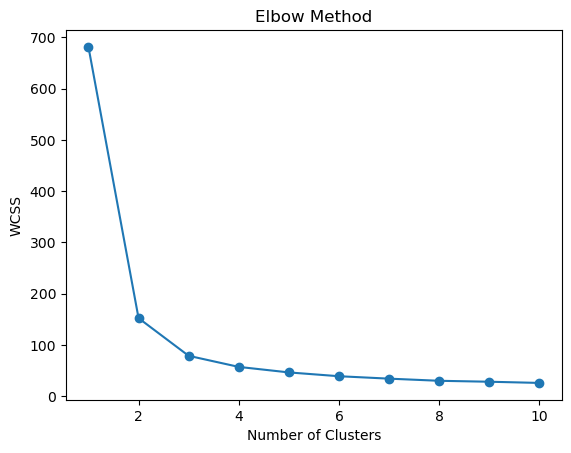

In [7]:
import matplotlib.pyplot as plt

wcss = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


b. Silhouette Analysis
Silhouette scores can identify the optimal number of clusters by checking cluster cohesion and separation.

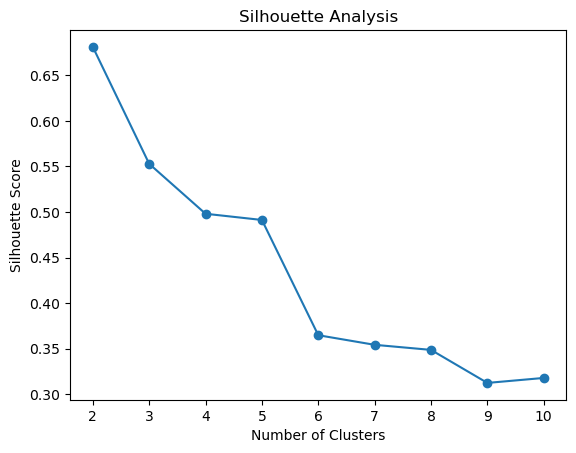

In [8]:
from sklearn.metrics import silhouette_samples
import numpy as np
range_clusters = range(2, 11)
silhouette_avgs = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
plt.plot(range_clusters, silhouette_avgs, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

2. Visualize the Clustering
a. Cluster Centers and Assignments
Visualize how data points are grouped and where the cluster centers are located (in 2D space).

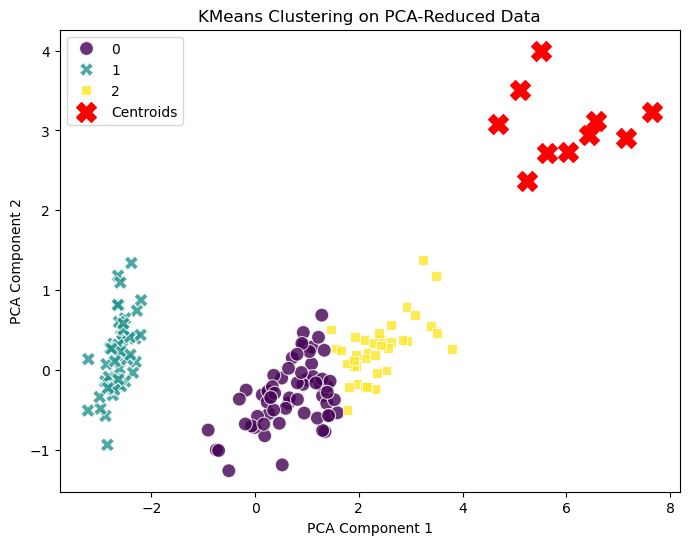

In [9]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_kmeans, palette='viridis',
    style=y_kmeans, s=100, alpha=0.8
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


b. Compare Clusters with Ground Truth
Evaluate how closely the clusters align with the true labels.

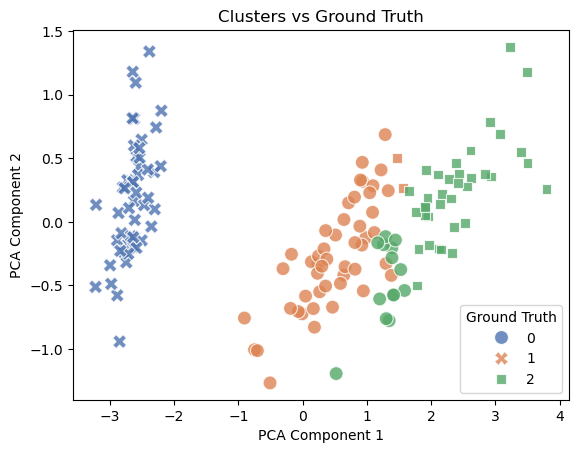

In [10]:
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y, palette='deep',
    style=y_kmeans, s=100, alpha=0.8
)
plt.title('Clusters vs Ground Truth')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Ground Truth', loc='best')
plt.show()

c. Silhouette Plot
Visualize the silhouette scores for individual samples to assess clustering quality.

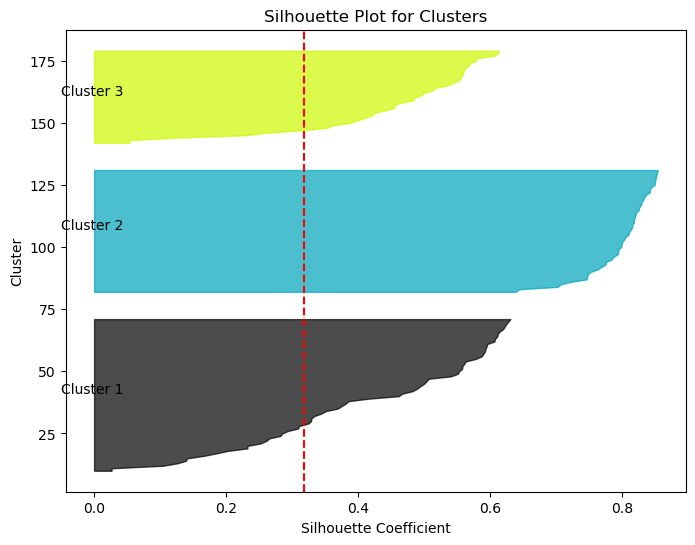

In [11]:
import matplotlib.cm as cm
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)
# Compute silhouette scores
silhouette_vals = silhouette_samples(X, cluster_labels)
y_lower = 10
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, f'Cluster {i + 1}')
    y_lower = y_upper + 10  # Add a gap between clusters
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()